In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split # utils
from sklearn.metrics import mean_absolute_error # eval metric

# data processing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets, linear_model, metrics

In [3]:
# Using Pandas to read input data and test data files
input_x = pd.read_csv('input/X_train.csv')
input_y = pd.read_csv('input/y_train.csv')['PRP']
x_test_final = pd.read_csv('input/X_test.csv')
input_x.head() # To check the data format

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,26,8000,32000,64,8,32


C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false'

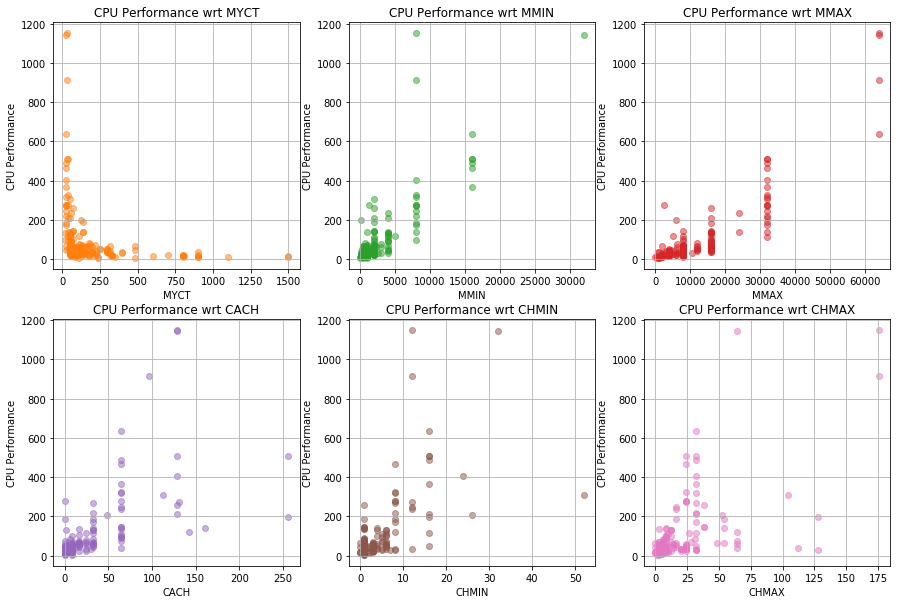

In [3]:
arr = np.array(input_x) # Convert to Numpy array
fig = plt.figure(figsize=(15,10))
# Plot the relation between MYCT and the CPU performance
ax = fig.add_subplot(2,3,1)
ax.cla()
ax.set_xlabel('MYCT')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt MYCT')
ax.scatter(arr[:,0],input_y,color='C1', alpha=0.5)
# Plot the relation between MMIN and the CPU performance
ax = fig.add_subplot(2,3,2)
ax.cla()
ax.set_xlabel('MMIN')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt MMIN')
ax.scatter(arr[:,1],input_y,color='C2', alpha=0.5)
# Plot the relation between MMAX and the CPU performance
ax = fig.add_subplot(2,3,3)
ax.cla()
ax.set_xlabel('MMAX')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt MMAX')
ax.scatter(arr[:,2],input_y,color='C3', alpha=0.5)
# Plot the relation between Cache and the CPU performance
ax = fig.add_subplot(2,3,4)
ax.cla()
ax.set_xlabel('CACH')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt CACH')
ax.scatter(arr[:,3],input_y,color='C4', alpha=0.5)
# Plot the relation between CHMIN and the CPU performance
ax = fig.add_subplot(2,3,5)
ax.cla()
ax.set_xlabel('CHMIN')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt CHMIN')
ax.scatter(arr[:,4],input_y,color='C5', alpha=0.5)
# Plot the relation between CHMAX and the CPU performance
ax = fig.add_subplot(2,3,6)
ax.cla()
ax.set_xlabel('CHMAX')
ax.set_ylabel('CPU Performance')
ax.grid('on')
ax.set_title('CPU Performance wrt CHMAX')
ax.scatter(arr[:,5],input_y,color='C6', alpha=0.5)

In [116]:
# Reading data file again to ensure clean daat when pre-processing.
input_x = pd.read_csv('input/X_train.csv')
input_y = pd.read_csv('input/y_train.csv')['PRP']
x_test_final = pd.read_csv('input/X_test.csv')

In [117]:
temp = np.array(input_x) # Convert to numpy array
mmean = np.mean(temp[:,[1,2]],axis=1)[:,None] # Get the MMIN and MMAX columns and find their mean
chmean = np.mean(temp[:,[4,5]],axis=1)[:,None] # Get the CHMIN and CHMAX columns and find their mean
chache = temp[:,3][:,None] # Get the Cache column
temp = temp[:,0][:,None] # Get the firt column
# Combine the columns in the order MYCT, MMEAN,Cache,CHMEAN
temp = np.hstack((temp,mmean))
temp = np.hstack((temp,chache))
temp = np.hstack((temp,chmean))
# Repeat the same process with the test data.
temp2 = np.array(x_test_final)
mmean2 = np.mean(temp2[:,[1,2]],axis=1)[:,None]
chmean2 = np.mean(temp2[:,[4,5]],axis=1)[:,None]
chache2 = temp2[:,3][:,None]
temp2 = temp2[:,0][:,None]

temp2 = np.hstack((temp2,mmean2))
temp2 = np.hstack((temp2,chache2))
temp2 = np.hstack((temp2,chmean2))

In [118]:
# Take only subset of the columns for data training. Columns taken MYCT, MMEAN, CACHE
temp = temp[:,[0,1,2]] # Best Try
temp2 = temp2[:,[0,1,2]] # Best Try

In [119]:
# Code referenced from https://stackoverflow.com/questions/10988082/multivariate-polynomial-regression-with-numpy
# Divide the training data into subsets of training and test data.
x_train, x_test, y_train, y_test = train_test_split(temp, input_y, test_size=0.2, random_state=2018)
# Create Object for generating a polynomila feature of 2
poly = PolynomialFeatures(degree=2,interaction_only=True)
# Convert the training data to polynomial matrix
x_poly = poly.fit_transform(x_train)

# Convert the test data to polynomial matrix
x_test_poly = poly.fit_transform(x_test)

# Remove polynomial orders from both the training and test datan that are not needed. Here the x column is removed.
x_poly = np.delete(x_poly,(1),axis=1)
x_test_poly = np.delete(x_test_poly,(1),axis=1)

# Generate the Linear Regression object
lr = linear_model.LinearRegression()
# Train the model using the training data.
lr.fit(x_poly, y_train)
# Predict the y-values from test data.
y_pred=lr.predict(x_test_poly)
# Remove negative data as all values of y are greater than 0
y_pred[y_pred < 0] = 0
# Find mean absolute error using th epredicted data and the original training data 
print('Model Avg:', mean_absolute_error(y_test, y_pred))
print('Mean  Avg:', mean_absolute_error(y_test, np.full(y_test.shape, input_y.mean())))
print("Prediction = ",y_pred)

Model Avg: 25.131501852249592
Mean  Avg: 79.95063025210084
Prediction =  [ 18.68554048  71.00448798  32.985258     0.         278.38817697
 123.84025818  82.40102721  21.39730258  26.59958047 695.38967873
  57.36193105 100.95193238  54.77991039  79.81039031 124.35498177
 130.01205384  20.71440161 110.25967841 103.27150789  79.48943387
  19.16896369   2.88256969  12.9649185   59.67272565   7.1335603
   0.7976448    0.          28.42014967   9.49525539  53.68042758
   6.9401432   53.99913661  42.7369931   41.71667033]


C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


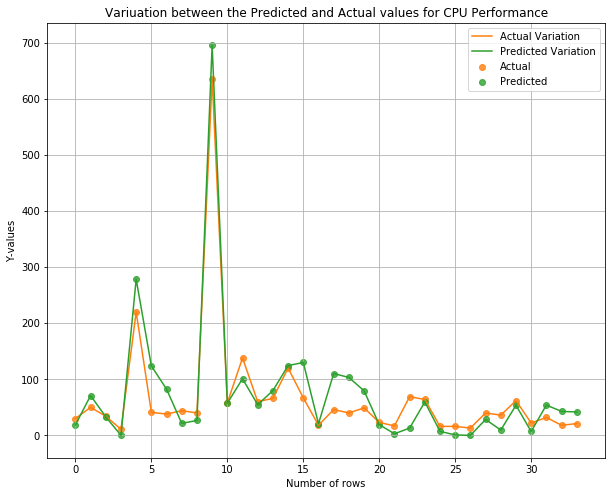

In [120]:
fig2 = plt.figure(figsize=(10,8))
# Plot the differences between the predicted and actual data.
ax2 = fig2.add_subplot(1,1,1)
ax2.cla()
ax2.set_xlabel('Number of rows')
ax2.set_ylabel('Y-values')
ax2.grid('on')
ax2.set_title('Variuation between the Predicted and Actual values for CPU Performance')
ax2.scatter(np.arange(y_test.size),y_test,color='C1', alpha=0.8, label='Actual')
ax2.plot(np.arange(y_test.size),y_test,color='C1', label='Actual Variation')
ax2.scatter(np.arange(y_test.size),y_pred,color='C2', alpha=0.8, label='Predicted')
ax2.plot(np.arange(y_test.size),y_pred,color='C2', label='Predicted Variation')
ax2.legend()

In [121]:
# Get the training data again to retrain the model. To be used with thetest data provided by Kaggle
x, y = temp, input_y.values

# Convert the training data to polynomial matrix
x_poly = poly.fit_transform(x)

# Convert the test data to polynomial matrix
x_test_final_poly = poly.fit_transform(temp2)

# Remove polynomial orders from both the training and test datan that are not needed. Here the x column is removed.
x_poly = np.delete(x_poly,(1),axis=1)
x_test_final_poly = np.delete(x_test_final_poly,(1),axis=1)

# Generate the Linear Regression object
lr = linear_model.LinearRegression()

# Train the model using the training data.
lr.fit(x_poly, y)
# Predict the y-values from test data.
y_pred=lr.predict(x_test_final_poly)
# Remove negative data as all values of y are greater than 0.
y_pred[y_pred < 0] = 0
# Write result to CSV file in the format given in Kaggle. 
# File writing code taken from https://www.kaggle.com/nessus/introduction-to-machine-learning-with-scikit-learn
df_sub = pd.DataFrame({'Id': np.arange(y_pred.size), 'PRP': y_pred})
df_sub.to_csv('submission2422748-2.csv', index=False)